In [7]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import tkinter
# file_path = './iris.csv'
# iris = pd.read_csv(file_path)
global df
df = pd.DataFrame(index=range(0,0), columns=['이름', '국어', '수학', '물리', '세계사'])
global data0001
data0001 = 10
global data0002

#오늘의 과제
#1)학생의 성적을 받는 로직 구현 (use dataFrame)
#2)학생의 성적을 토대로 분류 모델 머신러닝 구현 (use Classifier)



In [139]:
def insert() :
    global df
    name = input('이름을 작성하시오')
    motherTongue = input('국어 성적을 입력하시오')
    math = input('수학 성적을 입력하시오')
    physic = input('물리 성적을 입력하시오')
    history = input('세계사 성적을 입력하시오')
    df.loc[len(df)] = [name, motherTongue, math, physic, history]

def info() :
    global df
    print(df)

def saveCSV() :
    global df
    df.to_csv('./studentGrade.csv', index=False)

def loadCSV() :
    global df
    file_path = './studentGrade.csv'
    df = pd.read_csv(file_path)
    
def mathDataInfo() :
    global df
    mathData = df['수학']
    print(mathData)
    
# 데이터 불러오고, 0~100점 사이의 값이 없을 경우 (이상치) > 평균값으로 대체 
# 데이터 자체가 없을 경우 (결손값) > 평균값으로 대체
# 1) 데이터 불러오는 로직 (예) 수학의 평균, 국어의 평균과 같이 컬럼위치에 따라 평균이 달라짐)
# mathData = df['수학'] 특정 컬럼의 데이터를 모두 가져오고 평균값 구하기
# 그 후에 평균값을 결손값, 이상치에 덮어쓰기
# 2) 결손값, 이상치를 찾는 코드를 구현
# 결손값은 null값 혹은 0값을 찾으면 됨 > 
# 이상치 : 0~100점 사이 외의 값을 찾으면 됨 > 
# df.loc[df['수학'] == 조건넣기, ('수학')] = 바꿀 평균 값        
def dataFix() :
    global df
    #1) (컬럼마다) 평균값 구하기
    #ex) 자바는 반복문 돌면서 값을 전부 저장하고 갯수로 나누는 작업
    #axis : axis='rows' = row(튜플)기준으로 값을 도출
    #numeric_only=True : 데이터는 반드시 숫자로 인식한다는 옵션 (데이터 갯수 인식 포함)
    #mean : 평균값 구하기
    #2) 컬럼의 결손 위치, 이상 위치를 찾아서 업데이트
    #axis=1 인 columns기준으로 열을 줄이되, 값은 평균 mean값으로 변경
    avg = df.mean(axis='rows', numeric_only=True)
    #avg 데이터프레임을 순회를 기준으로 df 데이터프레임의 열(컬럼)값을 가져옴
    count = 1
    for i in avg :
        # print(i)
        # print(df.iloc[:,count])
    #순회하면서 100점 이상이 하나라도 있거나, 
    #0점보다 작을 경우
        # if (df.iloc[:,count] > 100).any() or (df.iloc[:,count] < 0).any()  :
        #     print('결손값 있음', df.iloc[:,count])
        #df.loc[조건문, 저장할 컬럼위치] = 넣을 데이터
        df.loc[df.iloc[:,count] > 100, df.columns[count]] = round(i)
        df.loc[df.iloc[:,count] < 0, df.columns[count]] = round(i)
        count = count + 1
        
    print(df)
    saveCSV()
    
def checkMethod() :
    global df
    count = 0
    print(range(len(df.columns)))
    for count in range(len(df.index)): #0, 8
        i = 1
        for i in range(len(df.columns)): #0, 5
            print(df.iloc[count,i-1], i)
            if (df.iloc[count,i] == ' ') or (int(df.iloc[count,i]) == 0) or (int(df.iloc[count,i]) > 100):
                df.iloc[count,i] = df.iloc[:,i].mean()
            else: 
                break
            i=i+1
        count=count+1
    print(df)

# def testCode(inputData) :
#     global data0001
#     data0001 = inputData

# def viewWindows() :
#     global data0001
    
#     window = Tk()
#     window.title("입력 프로그램")
#     window.geometry("400x400")
    
#     data0001 = tkinter.Entry(width=30)
#     data0001.place(x=20, y=20)
    
#     button = tkinter.Button(text="저장", command=testCode(data0001))
#     button.place(x=20, y=70)
    
#     window.mainloop()

In [140]:
#1. 반복문 + break;
#학생 성적을 계속 받아서 데이터에 저장하는 로직
#데이터는 반복문 밖에서 불어오면 단 1번만 실행하므로 불확정 요소 연산을 줄일 수 있다
#계속 반복적으로 csv파일을 로드하는 작업은 컴퓨터에 부하를 야기할 수 있다
loadCSV()
# info()
checkMethod()
# while True:
#     choice = input('학생 성적을 입력하시겠습니까? (y) 혹은 끝내겠습니까?')
#     if choice == 'y': 
#         insert()
#     else :
#         info()
#         saveCSV()
#         break
#extra. 이상치, 결손값 같은 데이터 불균형 상황을 어떤 프로세스(작업의 순서)로 작업을 할지 생각해보세요
#ex) 데이터 입력도중에 점수가 100점 이하이여야만 하는데 오타로써 405점 들어갈 경우, 데이터가 없는 경우

    
#2. 저장된 데이터 프레임을 csv확장자로 저장하기

#3. csv로 저장된 데이터 불러와서 데이터프레임에 저장
#(csv를 코드 초기에 불러오는 로직을 구현하여 DB대체 사용)

range(0, 5)
20 0


ValueError: invalid literal for int() with base 10: '김준석'

In [2]:
iris = load_iris()
# print(iris.DESCR)

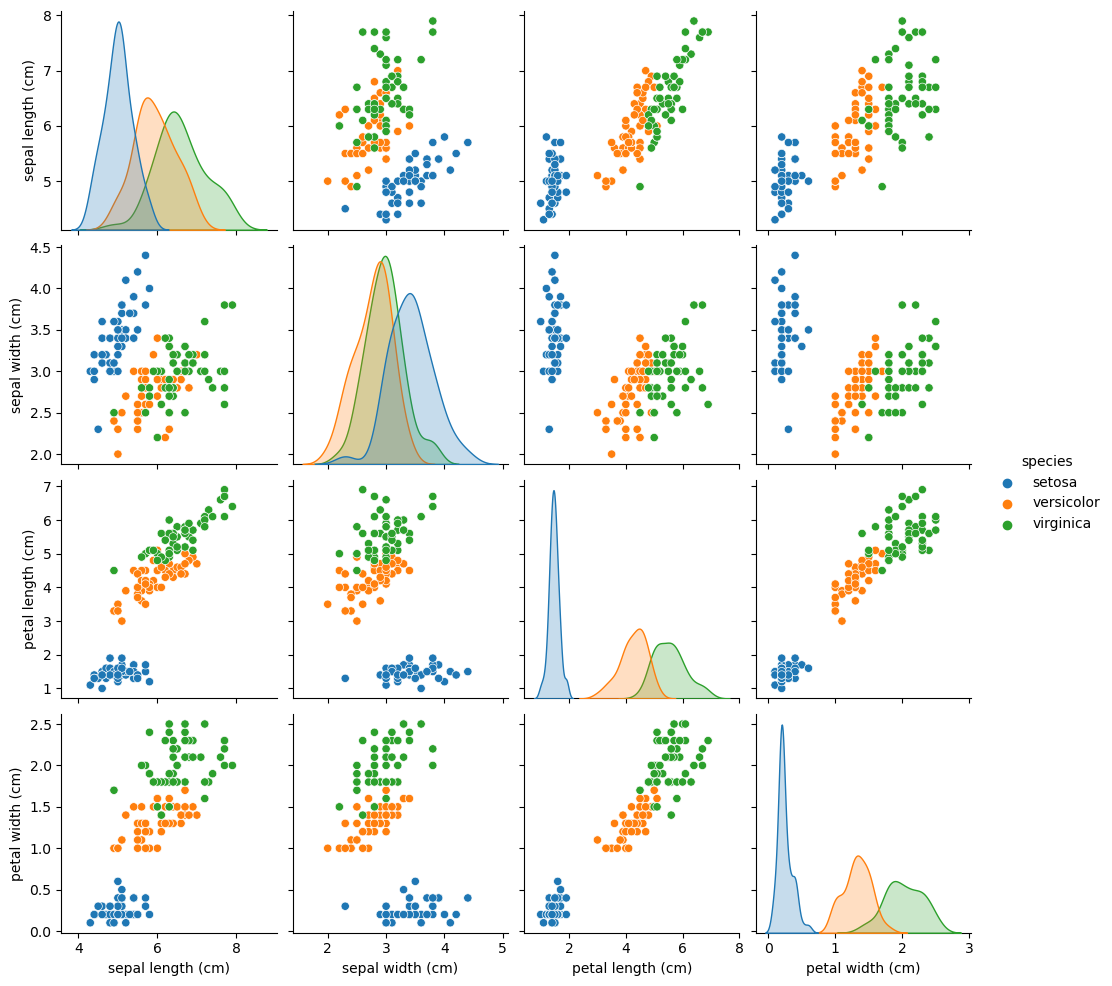

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
# print(sy)
df['species'] = sy
sns.pairplot(df, hue="species")
plt.show()